In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression
import seaborn as sns

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('titanic_train.csv')[['Age','Pclass','Fare','Survived']]

In [3]:
df.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [4]:
df.isnull().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:

X_train.head()

,Age,Pclass,Fare
30,40.0,1,27.7208
10,4.0,3,16.7000
873,47.0,3,9.0000
182,9.0,3,31.3875
876,20.0,3,9.8458


In [8]:
knn = KNNImputer()

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [10]:
X_train_trf=pd.DataFrame(X_train_trf, columns=X_train.columns)

In [11]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train_trf['Age'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  175.15629066815208


C:\Users\Alina\AppData\Local\Temp\ipykernel_21188\1082715809.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], hist=False, kde=True, bins=5, color='blue', hist_kws={'edgecolor': 'black'},label=X_train['Age'])
C:\Users\Alina\AppData\Local\Temp\ipykernel_21188\1082715809.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github

<AxesSubplot:xlabel='Age', ylabel='Density'>

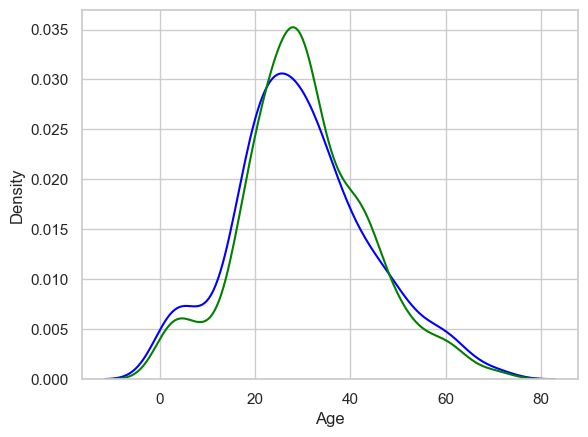

In [15]:
#distribution of age before and after replacing mean and median values
sns.set(style="whitegrid")  # Set the style of the plot
sns.distplot(X_train['Age'], hist=False, kde=True, bins=5, color='blue', hist_kws={'edgecolor': 'black'})
sns.distplot(X_train_trf['Age'], hist=False, kde=True, bins=5, color='green', hist_kws={'edgecolor': 'black'})


<AxesSubplot:>

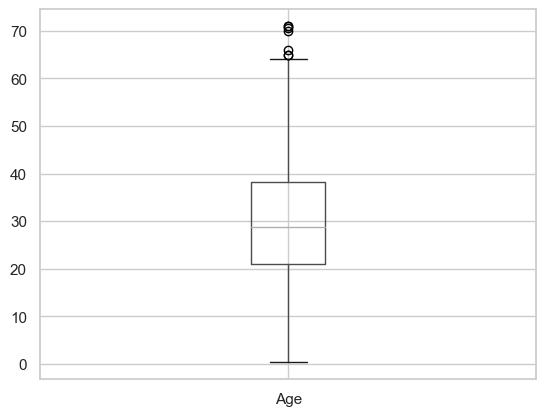

In [27]:
X_train[['Age']].boxplot()

<AxesSubplot:>

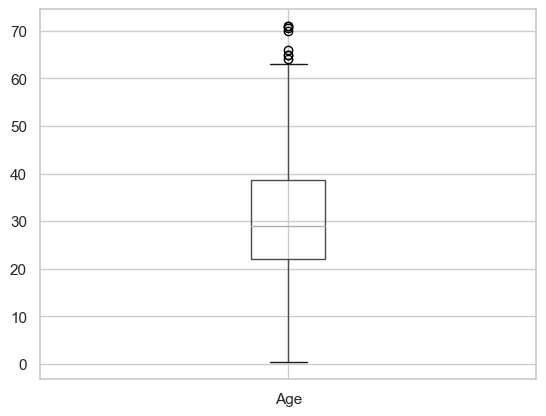

In [28]:
X_train_trf[['Age']].boxplot()

In [29]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7039106145251397

In [30]:
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)

In [31]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.7150837988826816

In [35]:
# Comparision with Simple Imputer- median

si = SimpleImputer(strategy='median')

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [36]:
lr = LogisticRegression()

lr.fit(X_train_trf2,y_train)

y_pred = lr.predict(X_test_trf2)

accuracy_score(y_test,y_pred)

0.6927374301675978